# Supervised Machine Learning

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command prompts matplotlib visuals to appear in the notebook

%matplotlib inline

In [3]:
# Create path

path = r'/Users/chadstacey'

In [4]:
# Import movies data

movies = pd.read_pickle(os.path.join(path, 'CF_Final_Project', 'Data', 'Prepared_Data', 'movies_cleaned_1.pkl'))

In [5]:
# Check output

movies.tail()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profit,score category
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,4750497.0,Low score
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,28368.0,Low score
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,275000.0,Middle score
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,25981.0,Middle score
6819,0.0,Les Productions du Trésor,France,Nicole Garcia,Drama,37757.0,From the Land of the Moon,R,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016,37757.0,Middle score


In [6]:
movies.shape

(6820, 17)

### 2. Data cleaning 

In [7]:
# Check for missing values

movies.isnull().sum()

# No missing values to handle

budget            0
company           0
country           0
director          0
genre             0
gross             0
name              0
rating            0
released          0
runtime           0
score             0
star              0
votes             0
writer            0
year              0
profit            0
score category    0
dtype: int64

In [8]:
# Check for duplicates

dups = movies.duplicated()

In [10]:
dups.shape # No dups 

(6820,)

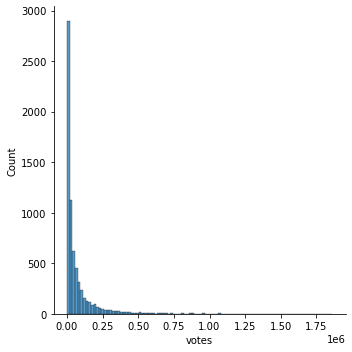

In [17]:
# Check extreme values

sns.displot(movies['votes'], bins=100)

# Some of the outliers in the high values may need to be removed, but let's try without doing so first

In [18]:
# Check the mean

movies['votes'].mean()

71219.52258064516

In [19]:
# Check the min

movies['votes'].min()

27

In [20]:
# Check the max

movies['votes'].max()

1861666

### 3. Data prep for regression analysis 

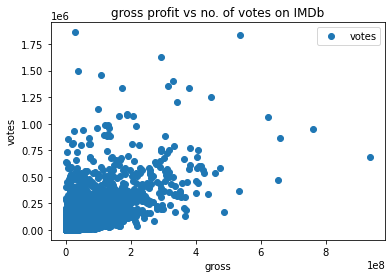

In [21]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other

movies.plot(x = 'gross', y = 'votes', style = 'o')
plt.title('gross profit vs no. of votes on IMDb')  
plt.xlabel('gross')  
plt.ylabel('votes')  
plt.show()

My hypothesis is: 'If a film has a high gross profit, it will garner more votes on IMDb.'

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = movies['gross'].values.reshape(-1,1)
y = movies['votes'].values.reshape(-1,1)

In [23]:
X

array([[5.22874140e+07],
       [7.01363690e+07],
       [1.79800601e+08],
       ...,
       [3.77500000e+06],
       [2.59810000e+04],
       [3.77570000e+04]])

In [24]:
y

array([[299174],
       [264740],
       [236909],
       ...,
       [ 36333],
       [  6947],
       [  2411]])

In [25]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [37]:
# Create a regression object

regression = LinearRegression()

In [38]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict the values of y based on the values of X

y_predicted = regression.predict(X_train)

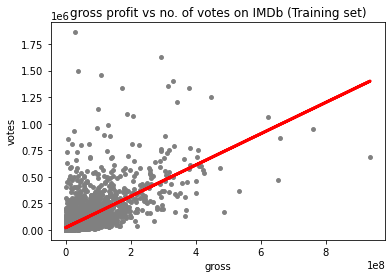

In [40]:
# Create a plot that shows the regression line from the model on the training set

plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 15)
plot_test.plot(X_train, y_predicted, color='red', linewidth =3)
plot_test.title('gross profit vs no. of votes on IMDb (Training set)')
plot_test.xlabel('gross')
plot_test.ylabel('votes')
plot_test.show()

The line doesn't appear to fit the data that well. A film's gross profit probably does have an effect on how many votes it generates on IMDb but it is unlikely to be the only factor. 

In [41]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_train, y_predicted) # This is mean squared error
r2 = r2_score(y_train, y_predicted) # This represents R2 score

In [42]:
# Print the model summary statistics and thus analyse the performance of the model 

print('Slope:', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00147309]]
Mean squared error:  10105786418.17828
R2 score:  0.43962483702924793


In [43]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,97712,118321.729476
1,263699,32723.493415
2,27268,126733.185048
3,12885,36198.259077
4,45511,74841.051663
5,2948,22402.193531
6,31451,101151.311567
7,63334,25015.568789
8,90264,22580.394914
9,7094,35674.387875


##### Compare how the regression fits the test set

In [46]:
# Predict

y_predicted_test = regression.predict(X_test)

In [47]:
rmse = mean_squared_error(y_test, y_predicted_test)
r2 = r2_score(y_test, y_predicted_test)

In [48]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00147309]]
Mean squared error:  8280816144.424536
R2 score:  0.43623220455396294


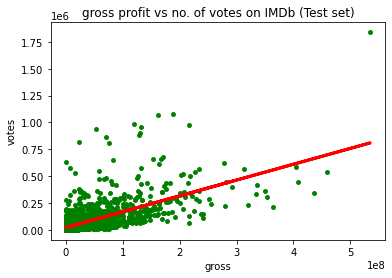

In [49]:
# Visualizing the test set results

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted_test, color='red', linewidth =3)
plot_test.title('gross profit vs no. of votes on IMDb (Test set)')
plot_test.xlabel('gross')
plot_test.ylabel('votes')
plot_test.show()

The model has not performed particularly well on the test set. This could be due to data bias or it could be due to there not being enough data points to produce statistically significant results. Either way, I'll need a model with more dimensionality to be able to accurately predict how many votes a film will generate on IMDb.